# Diagnosing the data issues:

In [ ]:
import pandas as pd 
import numpy as np 
% matplotlib inline
from codefiles.class2 import get_data

# The data you'll be exloring:

In [ ]:
data = get_data()

In [ ]:
data.head(10)

## Duplicated data: 

We seem to have a problem with some duplicated data: 

In [4]:
print('Before duplicates {}'.format(data.shape))
data = data.drop_duplicates()
print('After duplicates {}'.format(data.shape))

Before duplicates (200, 3)
After duplicates (194, 3)


In [5]:
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female
IIVXDNOAIV,1.0,165.0,female
VVQYVNRAGQ,18.0,134.0,female
YVEDWPTEEB,31.0,149.0,female


## Missing data: 

In [6]:
heights = data['height']
ages = data['age']
gender = data['gender']

##### How much missing data do we have for heights? 

In [7]:
missing_height = heights.isnull()

In [8]:
missing_height.head()

CFLOXRHMDR    False
FXLJSNLSOG    False
FWDIVJKGOI    False
YWEBKQWHRE    False
YPUQAPSOYJ    False
Name: height, dtype: bool

In [9]:
missing_height.sum()

4

In [10]:
data[missing_height]

,age,height,gender
CWCFROPRFE,22.0,NaN,male
EORSIPDIHA,21.0,NaN,MALE
NGJOHICWSY,41.0,NaN,male
LNLAPFIJEQ,37.0,NaN,male


##### How about age? 

In [11]:
missing_ages = ages.isnull()

In [12]:
data[missing_ages]

,age,height,gender
SSZQEGTLNK,NaN,162.0,male
TJQPFEFVVH,NaN,182.0,NaN
PYHWLDVICX,NaN,181.0,female
MLRPKGKACD,NaN,185.0,male
SGMGUJEBNC,NaN,173.0,MALE
YZDOYNOXAF,NaN,144.0,female
UAOAMGUQSX,NaN,144.0,male
JFVZOEGUUA,NaN,208.0,female
VYAQBLJKXJ,NaN,165.0,male


##### And gender? 

In [13]:
gender.value_counts(dropna=False)

female    111
male       65
MALE        9
NaN         9
Name: gender, dtype: int64

In [14]:
missing_gender = data['gender'].isnull()
data[missing_gender]

,age,height,gender
TJQPFEFVVH,NaN,182.0,NaN
QXUGUHCOPT,101.0,196.0,NaN
LKEHZFGGTS,49.0,177.0,NaN
EBTRPEDHJS,43.0,147.0,NaN
BDFQWIHWCH,27.0,167.0,NaN
NUCCGRJLXN,20.0,159.0,NaN
GQSNBZIGBL,27.0,197.0,NaN
KWJJMPVSCP,24.0,189.0,NaN
LMZUTCGFYT,21.0,153.0,NaN


But wait, we have another problem. We seem to have `male` and `MALE`:

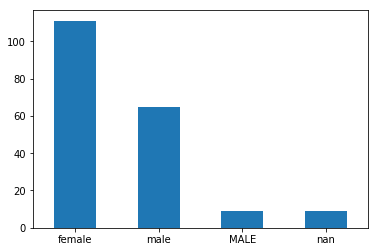

In [15]:
gender.value_counts(dropna=False).plot(kind='bar', rot=0)